In [3]:
# !pip install shap

In [4]:
# import packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt

c:\Users\ninac\anaconda3\envs\islp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
seed = 2724

### Import data

In [ ]:
DF_PATH = "mod04_data/sample.csv"
df = pd.read_csv(DF_PATH)

### Separate data by independent (X) and dependent (y) variables

In [9]:
X = df[["income", "education_years", "zipcode_score"]]
y = df["target"]

### Split the data into a _training_ set (to build a model) and _test_ set (to validate a model)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed
)

### Build a model on the training set

In [11]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=seed
)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=2724)

### Use SHAP to explain the model on test data

In [12]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

100%|===================| 1494/1500 [01:56<00:00]        

This will allow us to see which variables are most important to predicting the outcome.

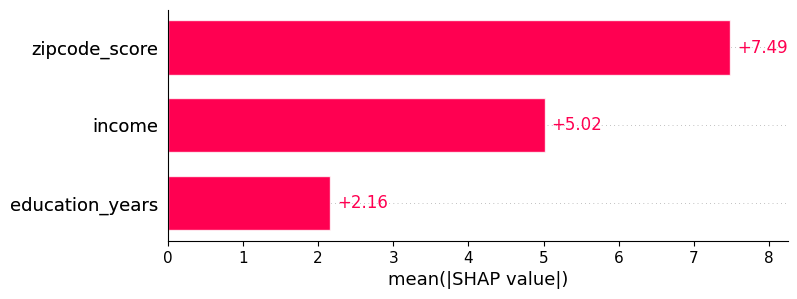

In [13]:
shap.plots.bar(shap_values)

### Import the `group` variable, which was **not** used in training this model.

In [14]:
X_test_with_group = X_test.copy()
X_test_with_group["group"] = df.loc[X_test.index, "group"]

### Look at the difference in SHAP values between the two groups across the variables used in the model.

In [15]:
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_df["group"] = X_test_with_group["group"].values

shap_df.groupby("group").mean()

,income,education_years,zipcode_score
group,,,
0,1.086254,-0.170779,5.866534
1,1.020094,-0.192841,-6.859435


### Let's put `group` and `zipcode_score` in the same plot

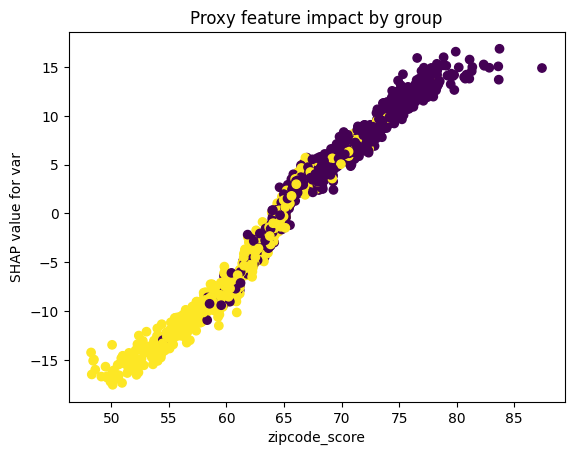

In [16]:
def plot_shap(var):
    # Extract SHAP values for the feature
    shap_var = shap_values[:, var].values

    # Plot the values of each group using different colors
    plt.figure()
    plt.scatter(
        X_test[var],
        shap_var,
        c=X_test_with_group["group"]
    )
    plt.xlabel(var)
    plt.ylabel(f"SHAP value for var")
    plt.title("Proxy feature impact by group")
    plt.show()

plot_shap("zipcode_score")

# Discussion Questions

### What is a _SHAP_ (or Shapley) value? 

A shap value is the number to display how influential a variable is to a machine learning model. It shows whether the feature increases or decreases the predicted value and quantifies it.

### Suppose you built this model and then it is peer reviewed by another entity. If the reviewer asks whether you used the variable `group` in your model, what would your answer be?

No we did not use hte group variable into the model because the group variable that was added was not used to train the model or test the model.

### If the reviewer asks whether the outcome of your model is correlated with `group`, what would your answer be?

I would say that the outcome of the model is correlated woht group because we can see from the shap plot that group and zipcode are slightly interconnected and have separation in the groups.

### Construct a "proxy feature impact by group" plot for `income`. How is this plot different from the one for `zipcode_score`?

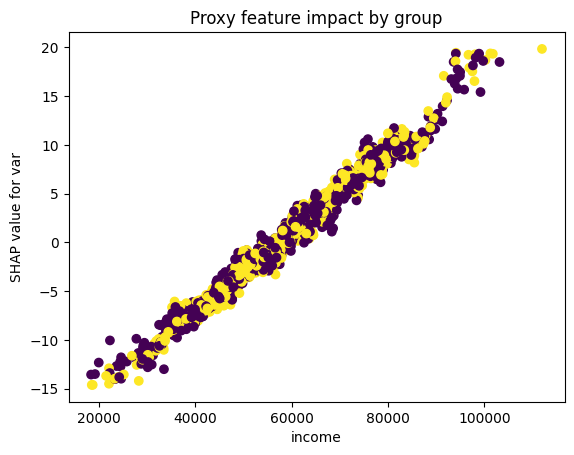

In [18]:
plot_shap("income")

This plot is different because the datapoints seem to be a lot more interconnected as there is no clear division between group feature and income as compared to the other plot where you could draw a line and completely separate the two variables.

### If, instead, you were the **reviewer**, what other questions might you ask the person who built this model? Give at least two.

If I were the reviewer I would ask how does model performance compare between the training and test sets also what happens to the model’s predictions if zipcode_score is removed?